In [1]:
import pandas as pd

df = pd.read_csv("hf://datasets/GeorgiaCh96/WESAD_raw_data/WESAD_raw_data.csv")

In [2]:
print(df)

             Time     MEAN_RR  MEDIAN_RR        SDRR      RMSSD       SDSD  \
0        2.500754  654.010015  649.40833   49.342563  11.677158  11.676994   
1        2.504921  654.063862  649.40833   49.300854  11.611629  11.611626   
2        2.509087  654.024936  649.40833   49.326015  11.627159  11.627112   
3        2.513254  653.968183  649.40833   49.369481  11.417706  11.417571   
4        2.517421  654.048424  649.40833   49.279428  11.230305  11.228757   
...           ...         ...        ...         ...        ...        ...   
196973  84.981270  886.194981  877.46848  152.445203  25.130411  25.127885   
196974  84.985437  885.893344  877.46848  152.200113  25.150000  25.148425   
196975  84.989603  885.673697  877.46848  152.009354  25.164222  25.163607   
196976  84.993770  885.567593  877.46848  151.913478  25.171764  25.171726   
196977  84.997937  885.590828  877.46848  151.934639  25.176858  25.176712   

        SDRR_RMSSD         HR  pNN25  pNN50  ...  KURT_SQUARE  

In [3]:
df.head

<bound method NDFrame.head of              Time     MEAN_RR  MEDIAN_RR        SDRR      RMSSD       SDSD  \
0        2.500754  654.010015  649.40833   49.342563  11.677158  11.676994   
1        2.504921  654.063862  649.40833   49.300854  11.611629  11.611626   
2        2.509087  654.024936  649.40833   49.326015  11.627159  11.627112   
3        2.513254  653.968183  649.40833   49.369481  11.417706  11.417571   
4        2.517421  654.048424  649.40833   49.279428  11.230305  11.228757   
...           ...         ...        ...         ...        ...        ...   
196973  84.981270  886.194981  877.46848  152.445203  25.130411  25.127885   
196974  84.985437  885.893344  877.46848  152.200113  25.150000  25.148425   
196975  84.989603  885.673697  877.46848  152.009354  25.164222  25.163607   
196976  84.993770  885.567593  877.46848  151.913478  25.171764  25.171726   
196977  84.997937  885.590828  877.46848  151.934639  25.176858  25.176712   

        SDRR_RMSSD         HR  pN

In [4]:
df.info

<bound method DataFrame.info of              Time     MEAN_RR  MEDIAN_RR        SDRR      RMSSD       SDSD  \
0        2.500754  654.010015  649.40833   49.342563  11.677158  11.676994   
1        2.504921  654.063862  649.40833   49.300854  11.611629  11.611626   
2        2.509087  654.024936  649.40833   49.326015  11.627159  11.627112   
3        2.513254  653.968183  649.40833   49.369481  11.417706  11.417571   
4        2.517421  654.048424  649.40833   49.279428  11.230305  11.228757   
...           ...         ...        ...         ...        ...        ...   
196973  84.981270  886.194981  877.46848  152.445203  25.130411  25.127885   
196974  84.985437  885.893344  877.46848  152.200113  25.150000  25.148425   
196975  84.989603  885.673697  877.46848  152.009354  25.164222  25.163607   
196976  84.993770  885.567593  877.46848  151.913478  25.171764  25.171726   
196977  84.997937  885.590828  877.46848  151.934639  25.176858  25.176712   

        SDRR_RMSSD         HR  

In [5]:
df.columns[-10:]

Index(['KURT_SQUARE', 'HR_SQRT', 'MEAN_RR_MEAN_MEAN_REL_RR', 'SD2_LF', 'HR_LF',
       'HR_HF', 'HF_VLF', 'subject id', 'condition', 'SSSQ'],
      dtype='object')

In [6]:
# inspecting labels
print(df['condition'].unique())

# frequency
print(df['condition'].value_counts())

if 'label' in df.columns:
    print(df['label'].unique())
    print(df['label'].value_counts())


['baseline' 'amusement' 'meditation' 'stress']
condition
baseline      76440
meditation    51976
stress        43886
amusement     24676
Name: count, dtype: int64


In [ ]:
# findings: 4 classes/labels:
# 1) Baseline, 2) Amusement, 3) Meditation, 4) Stress

In [7]:
# mapping labels to class numbers
label_map = {
    'baseline': 0,
    'stress': 1,
    'amusement': 2,
    'meditation': 3
}
df['label'] = df['condition'].map(label_map)


In [9]:
# feature target split
# excluding any non-feature columns like time, subject_id, condition, label
X = df.drop(['Time', 'subject id', 'condition', 'label'], axis=1)
y = df['label']

In [11]:
# performing tts
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

In [12]:
# checking for missing value
missing_summary = df.isnull().sum().sort_values(ascending=False)
print(missing_summary[missing_summary > 0])
missing_percentage = (df.isnull().sum().sum() / df.size) * 100
print(f"missing %: {missing_percentage:.4f}%")

Series([], dtype: int64)
missing %: 0.0000%


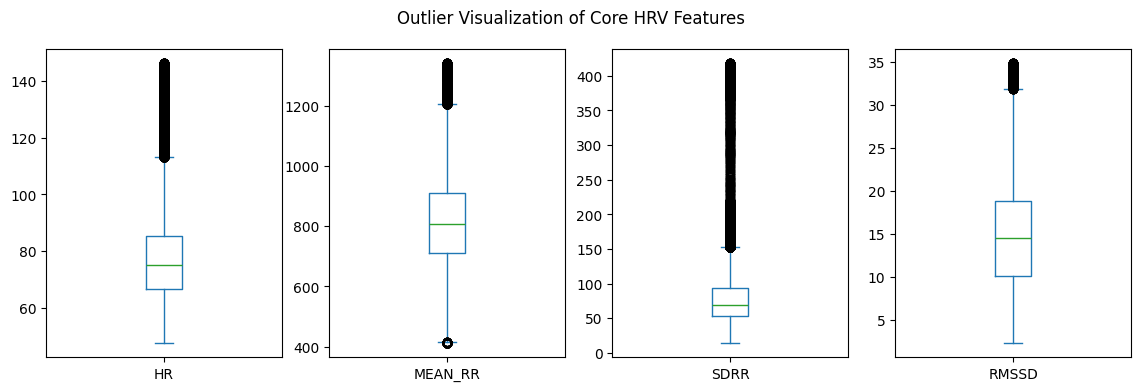

In [13]:
# detecting noise or outliers, 
# since biosignals (HR, GSR, EEG) are prone to spikes or drift noise, visualize distributions and signal trends
import matplotlib.pyplot as plt

features_to_plot = ['HR', 'MEAN_RR', 'SDRR', 'RMSSD'] 
df[features_to_plot].plot(kind='box', subplots=True, layout=(1,4), figsize=(14,4))
plt.suptitle("Outlier Visualization of Core HRV Features")
plt.show()


In [ ]:
# HR (Heart Rate):
# Median ~75–80 bpm → normal resting zone.
# Upper whisker around 110–120 bpm → normal stress response.
# Outliers up to 140–150 bpm → physical motion or high arousal (stress or amusement peaks).
# Very few below 50 → meditation or calm baseline.

# MEAN_RR (Average R–R Interval):
# Median ~800 ms (≈75 bpm) → matches HR median.
# Outliers <450 ms (≈130 bpm) → stress or motion artifacts.
# Outliers >1200 ms → occasional low heart rate or noise.

# SDRR (Standard Deviation of RR Intervals):
# Median ~60 ms; high variance in outliers up to 300–400 ms.
# Indicates segments with strong HRV bursts (likely amusement or deep meditation).
# Many outliers suggest intermittent physiological noise or emotional transitions.

# RMSSD (Short-term HRV):
# Median ~14–15 ms; mild spread.
# Outliers >30 ms (parasympathetic dominance) → relaxation states (meditation).
# Minimal low-end outliers → consistent HRV baseline quality.

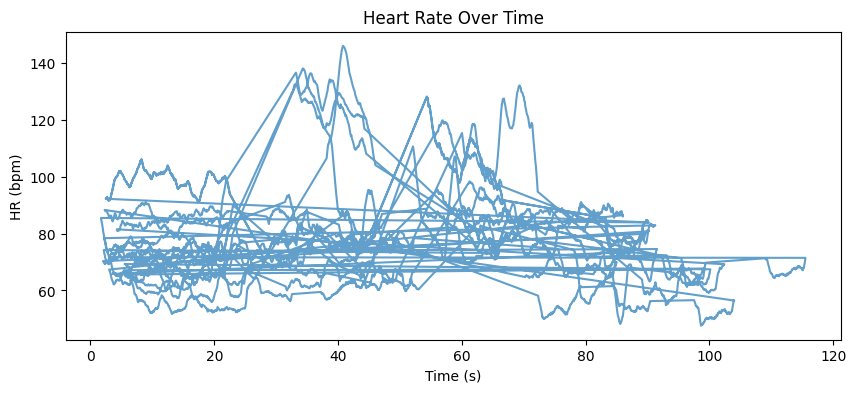

In [14]:
# time series trend (potential for outliers)
plt.figure(figsize=(10,4))
plt.plot(df['Time'], df['HR'], alpha=0.7)
plt.title("Heart Rate Over Time")
plt.xlabel("Time (s)")
plt.ylabel("HR (bpm)")
plt.show()

In [ ]:
# HR fluctuates between ~60–150 bpm with sharp transient peaks.
# Clear presence of episodes of arousal followed by drops.
# Dense overlap near 70–90 bpm (baseline + meditation).
# Multiple overlapping trajectories → data from multiple subjects.

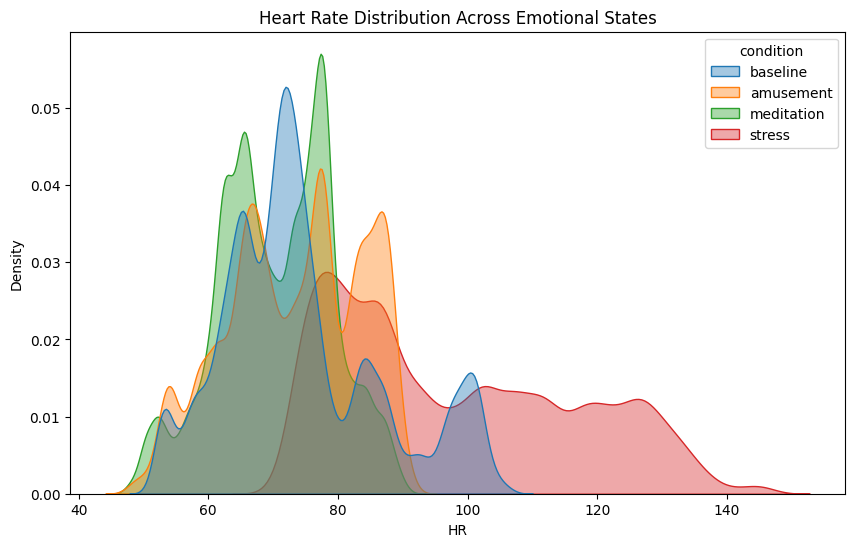

In [15]:
# feature distribution per condition
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='HR', hue='condition', fill=True, common_norm=False, alpha=0.4)
plt.title("Heart Rate Distribution Across Emotional States")
plt.show()

In [ ]:
# Stress (red): shifted toward higher HRs (peaks around 100–120 bpm).
# Meditation (green): lower HR peak (~70 bpm) and narrower distribution.
# Baseline (blue): centered near 75–80 bpm — moderate spread.
# Amusement (orange): intermediate HRs (~85–95 bpm), with overlap into stress zone.
# this confirms that heart rate alone is a partial but valid discriminator of emotion intensity, not valence

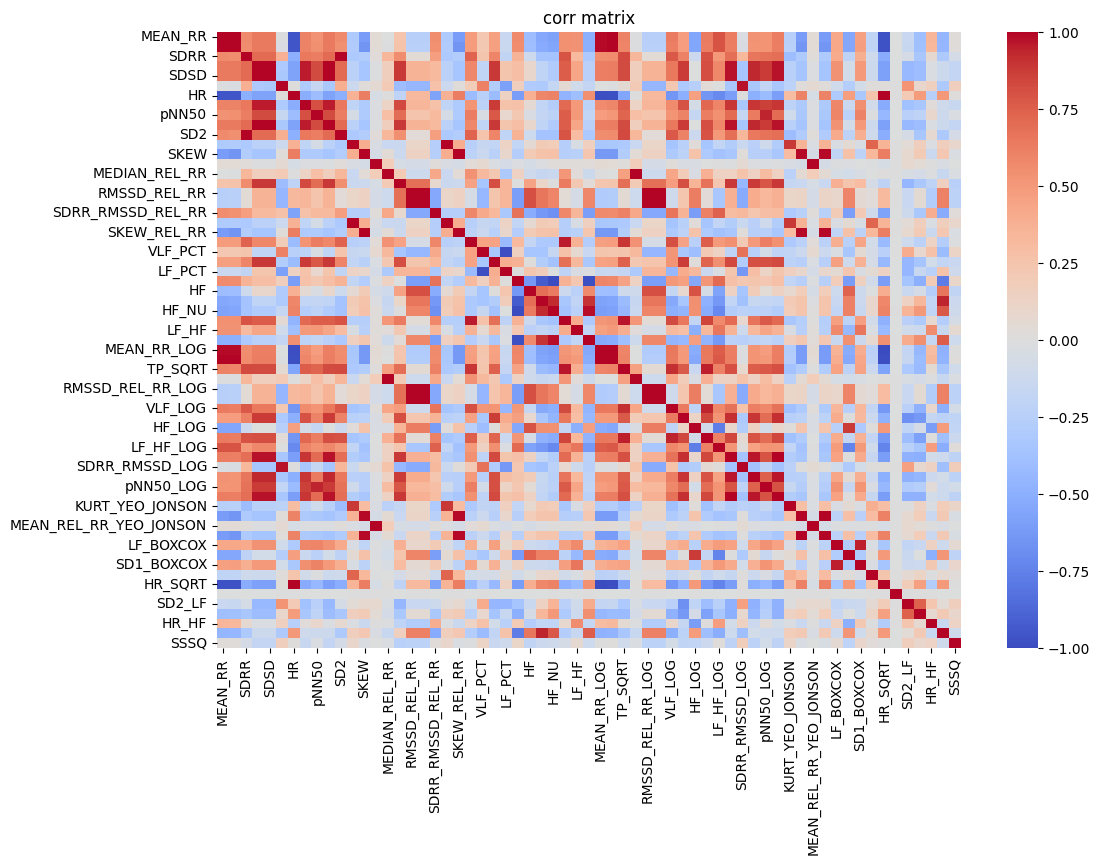

                         MEAN_RR  MEDIAN_RR      SDRR     RMSSD      SDSD  \
MEAN_RR                      NaN   0.996010       NaN       NaN       NaN   
MEDIAN_RR               0.996010        NaN       NaN       NaN       NaN   
SDRR                         NaN        NaN       NaN       NaN       NaN   
RMSSD                        NaN        NaN       NaN       NaN  0.999999   
SDSD                         NaN        NaN       NaN  0.999999       NaN   
SDRR_RMSSD                   NaN        NaN       NaN       NaN       NaN   
HR                           NaN        NaN       NaN       NaN       NaN   
pNN25                        NaN        NaN       NaN  0.958459  0.958467   
pNN50                        NaN        NaN       NaN  0.824717  0.824694   
SD1                          NaN        NaN       NaN  0.999999       NaN   
SD2                          NaN        NaN  0.999981       NaN       NaN   
KURT                         NaN        NaN       NaN       NaN       NaN   

In [16]:
# studying corr matrix of highly correlated pairs only to avoid cluttering...
plt.figure(figsize=(12,8))
corr = X.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("corr matrix")
plt.show()
high_corr = corr[(corr > 0.8) & (corr < 1.0)]
print(high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1))

In [ ]:
# Strong red diagonals → expected self-correlation among HRV derivatives:
# RMSSD, SDSD, SDRR highly correlated (>0.8).
# HF_LOG, LF_LOG, LF_HF also clustered.
# Some cross-correlation between MEAN_RR and HR (inverse relationship).
# Lower correlation among derived transforms (BOXCOX, YEO_JOHNSON) indicates normalization variants.
# No extreme multi-collinearity outside the HRV group — good sign

# Keeping SDRR, drop SDSD and RMSSD_REL_RR variants.
# Keeping HF_LOG, drop redundant power transforms.
# This helps avoid redundant decision boundaries during training.

In [17]:
import numpy as np

def cap_outliers(series, z_thresh=3):
    mean, std = series.mean(), series.std()
    upper, lower = mean + z_thresh * std, mean - z_thresh * std
    return np.clip(series, lower, upper)

for col in ['HR', 'MEAN_RR', 'SDRR', 'RMSSD']:
    df[col] = cap_outliers(df[col])

In [18]:
for col in ['HR', 'MEAN_RR', 'SDRR', 'RMSSD']:
    df[col] = df[col].rolling(window=5, min_periods=1, center=True).median()

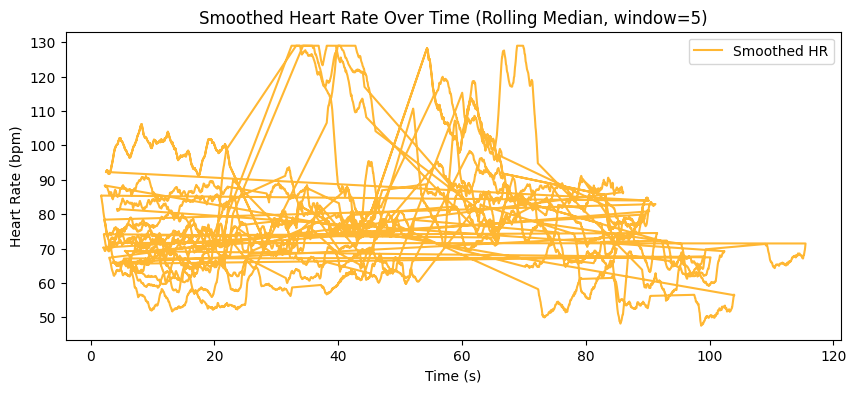

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df['Time'], df['HR'], label='Smoothed HR', color='orange', alpha=0.8)
plt.title("Smoothed Heart Rate Over Time (Rolling Median, window=5)")
plt.xlabel("Time (s)")
plt.ylabel("Heart Rate (bpm)")
plt.legend()
plt.show()


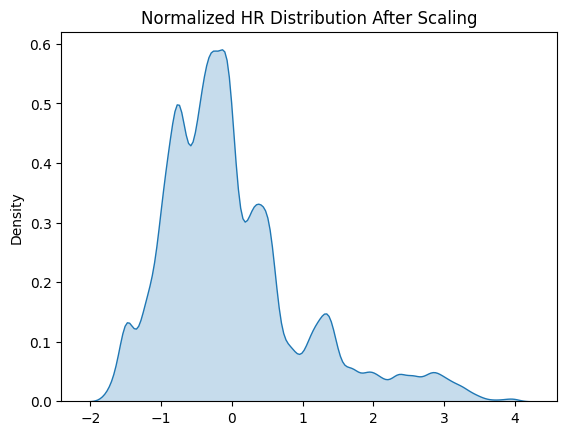

In [20]:
# Distribution Handling, each biosignal contributes equally and no feature dominates due to larger numeric range
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# plot new dist.
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(X_scaled[:, X.columns.get_loc('HR')], fill=True)
plt.title("Normalized HR Distribution After Scaling")
plt.show()


The HR and HRV features are now centered (mean = 0, std = 1)

In [21]:
# Feature dropping
# features like SDRR, SDSD, and RMSSD_REL_RR were heavily correlated (r > 0.8)
import numpy as np
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print("dropped high r:\n", to_drop)
X_pruned = X.drop(columns=to_drop)


dropped high r:
 ['MEDIAN_RR', 'SDSD', 'HR', 'pNN25', 'SD1', 'SD2', 'SDRR_REL_RR', 'SDSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'LF', 'LF_PCT', 'HF_PCT', 'HF_NU', 'TP', 'HF_LF', 'MEAN_RR_LOG', 'MEAN_RR_SQRT', 'TP_SQRT', 'MEDIAN_REL_RR_LOG', 'RMSSD_REL_RR_LOG', 'SDSD_REL_RR_LOG', 'VLF_LOG', 'LF_LOG', 'TP_LOG', 'RMSSD_LOG', 'SDRR_RMSSD_LOG', 'pNN25_LOG', 'pNN50_LOG', 'SD1_LOG', 'KURT_YEO_JONSON', 'SKEW_YEO_JONSON', 'MEAN_REL_RR_YEO_JONSON', 'SKEW_REL_RR_YEO_JONSON', 'HF_BOXCOX', 'SD1_BOXCOX', 'HR_SQRT', 'HF_VLF']


In [22]:
# Signal Quality Validation
# we wanna confirm that after cleaning, features still follow realistic physiological ranges
summary = df[['HR', 'MEAN_RR', 'SDRR', 'RMSSD']].describe()
print(summary)

                  HR        MEAN_RR           SDRR          RMSSD
count  196978.000000  196978.000000  196978.000000  196978.000000
mean       78.348929     804.681251      76.060391      15.080078
std        16.611982     154.291063      31.764489       6.252212
min        47.563863     411.112760      13.797191       2.295982
25%        66.657708     711.179980      53.858479      10.109690
50%        75.122681     807.011098      69.658087      14.504024
75%        85.248805     909.338005      93.339991      18.814452
max       128.953350    1268.177229     181.960266      33.840492


In [24]:
print("shape before drop:", X.shape)
print("shape after drop:", X_pruned.shape)

shape before drop: (196978, 63)
shape after drop: (196978, 25)


In [25]:
print(X_pruned.isnull().sum().sum())

0


In [26]:
# merge and scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_final = pd.DataFrame(scaler.fit_transform(X_pruned), columns=X_pruned.columns)

# putting target label back
df_clean = pd.concat([X_final, y.reset_index(drop=True)], axis=1)


In [27]:
print(df_clean.head())
print("final ds:", df_clean.shape)
print("label dist:\n", df_clean['label'].value_counts())

    MEAN_RR      SDRR     RMSSD  SDRR_RMSSD     pNN50      KURT      SKEW  \
0 -0.975735 -0.777344 -0.544231   -0.637880 -0.477674 -0.469894 -0.120978   
1 -0.975387 -0.778532 -0.554710   -0.625930 -0.477674 -0.464436 -0.122777   
2 -0.975639 -0.777815 -0.552226   -0.627999 -0.477674 -0.468070 -0.120656   
3 -0.976006 -0.776577 -0.585721   -0.579836 -0.477674 -0.473759 -0.118692   
4 -0.975487 -0.779142 -0.615689   -0.541996 -0.477674 -0.466554 -0.115379   

   MEAN_REL_RR  MEDIAN_REL_RR  RMSSD_REL_RR  ...    HF_LOG  LF_HF_LOG  \
0     0.019526      -0.233846      1.171546  ...  1.671514  -1.776257   
1     0.027032      -0.233846      1.087756  ...  1.673676  -1.767869   
2    -0.315006      -0.233846      1.091488  ...  1.674391  -1.758735   
3    -0.690148      -0.233846      0.959488  ...  1.673805  -1.749213   
4    -0.722312      -0.233846      0.931131  ...  1.671891  -1.739352   

   LF_BOXCOX  KURT_SQUARE  MEAN_RR_MEAN_MEAN_REL_RR    SD2_LF     HR_LF  \
0  -0.305790    -0.2174

DIMENSIONALITY REDUCTION (PCA)

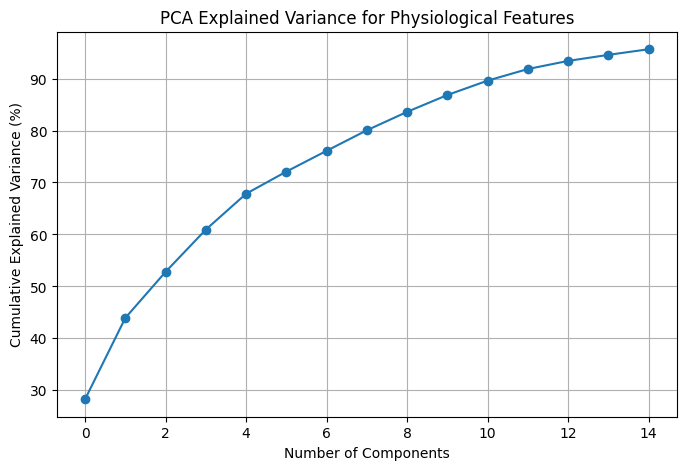

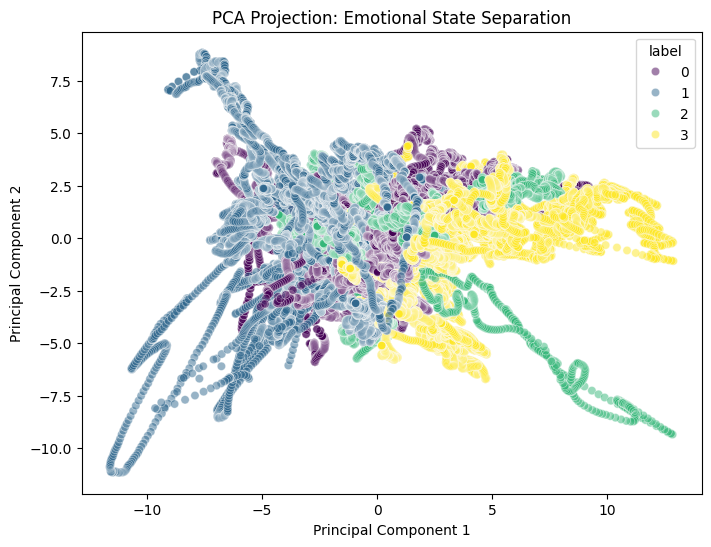

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# separate feature from label
X_final = df_clean.drop(columns=['label'])
y_final = df_clean['label']

#pca
pca = PCA(n_components=0.95)  #keep 95% var
X_pca = pca.fit_transform(X_final)

#var plt
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA Explained Variance for Physiological Features')
plt.grid(True)
plt.show()

# 2d pca visualisation
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_final, palette='viridis', alpha=0.5)
plt.title('PCA Projection: Emotional State Separation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Meditation (yellow) is well-separated, far right, compact cluster → low HR, high HRV stability.
Stress (blue) forms dense, stretched trajectories opposite meditation → high HR, low HRV.
Amusement (green) sits in between — partial overlap with stress (shared arousal), but diverges due to positive valence effects (HR peaks but higher RMSSD).
Baseline (purple) scattered near the origin → intermediate between stress and calm.
PC1 likely encodes “Arousal Intensity”, heart rate and sympathetic activation.
PC2 likely encodes “Emotional Valence”, relaxation vs engagement.

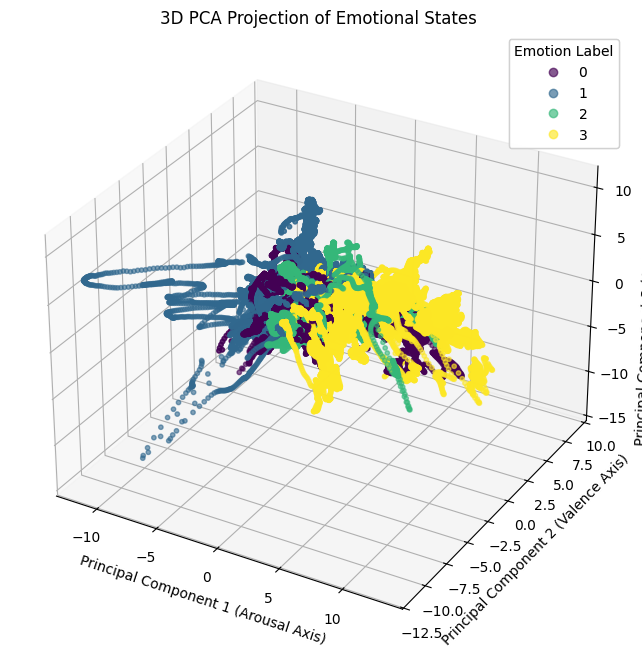

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting
import seaborn as sns

# Separate features and labels
X_final = df_clean.drop(columns=['label'])
y_final = df_clean['label']

# Re-run PCA for 3D (first 3 components)
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_final)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot by emotional class
scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=y_final, cmap='viridis', alpha=0.6, s=10
)

# Add labels and legend
ax.set_title("3D PCA Projection of Emotional States")
ax.set_xlabel("Principal Component 1 (Arousal Axis)")
ax.set_ylabel("Principal Component 2 (Valence Axis)")
ax.set_zlabel("Principal Component 3 (Autonomic Variation)")
legend = ax.legend(*scatter.legend_elements(), title="Emotion Label")
ax.add_artist(legend)

plt.show()


TRAINING 🏋🏻‍♂️

              precision    recall  f1-score   support

    baseline       1.00      1.00      1.00      7644
      stress       1.00      1.00      1.00      4389
   amusement       1.00      1.00      1.00      2467
  meditation       1.00      1.00      1.00      5198

    accuracy                           1.00     19698
   macro avg       1.00      1.00      1.00     19698
weighted avg       1.00      1.00      1.00     19698



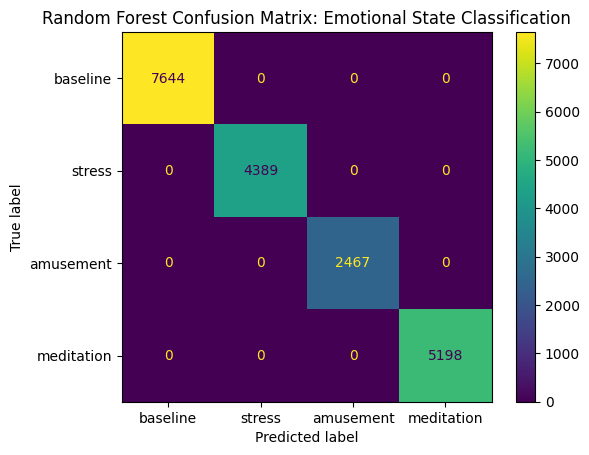

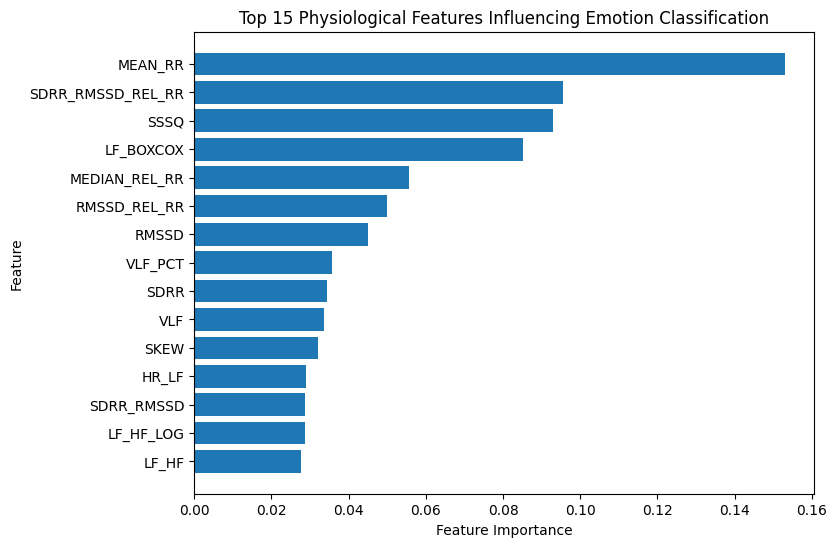

              Feature  Importance
0             MEAN_RR    0.152972
1   SDRR_RMSSD_REL_RR    0.095427
2                SSSQ    0.092849
3           LF_BOXCOX    0.085269
4       MEDIAN_REL_RR    0.055715
5        RMSSD_REL_RR    0.049937
6               RMSSD    0.044978
7             VLF_PCT    0.035650
8                SDRR    0.034471
9                 VLF    0.033542
10               SKEW    0.031924
11              HR_LF    0.029011
12         SDRR_RMSSD    0.028812
13          LF_HF_LOG    0.028604
14              LF_HF    0.027523


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X = X_final.copy()
y = y_final.copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# preds
y_pred = rf.predict(X_test)

# eval
print(classification_report(y_test, y_pred, target_names=['baseline', 'stress', 'amusement', 'meditation']))

# cm
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['baseline', 'stress', 'amusement', 'meditation'])
disp.plot(cmap='viridis', values_format='d')
plt.title("rf cm")
plt.show()

# feature imp
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = np.array(X.columns)

plt.figure(figsize=(8,6))
plt.barh(features[indices[:15]][::-1], importances[indices[:15]][::-1])
plt.title("Top 15 Physiological Features Influencing Emotion Classification")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

feature_ranking = pd.DataFrame({
    'Feature': features[indices],
    'Importance': importances[indices]
})
print(feature_ranking.head(15))


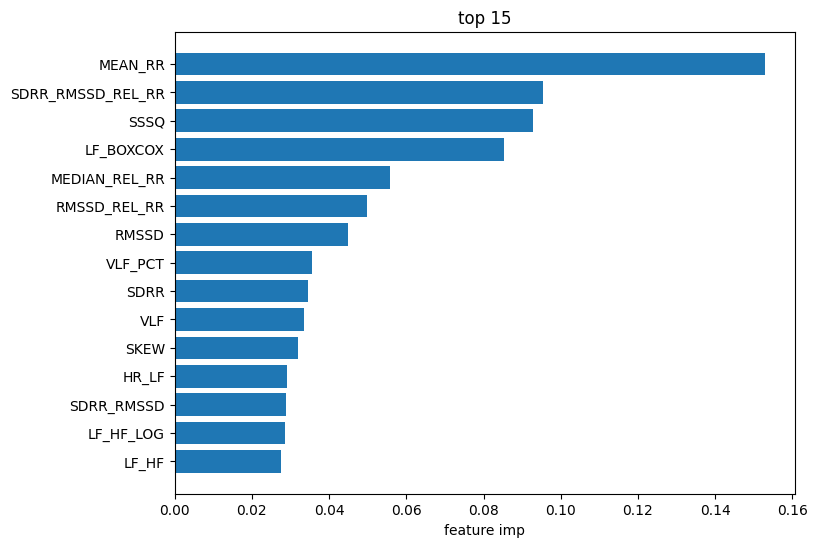

In [31]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,6))
plt.barh(X_final.columns[indices[:15]][::-1], importances[indices[:15]][::-1])
plt.title("top 15")
plt.xlabel("feature imp")
plt.show()

Testing 🧑🏻‍🔬

In [33]:
sample = X_test.sample(5, random_state=42)
preds = rf.predict(sample)
probs = rf.predict_proba(sample)

label_map = {0:'baseline', 1:'stress', 2:'amusement', 3:'meditation'}
for i in range(len(sample)):
    print(f"Predicted: {label_map[int(preds[i])]} | Probabilities: {probs[i]}")



Predicted: meditation | Probabilities: [0.00333333 0.         0.         0.99666667]
Predicted: meditation | Probabilities: [0. 0. 0. 1.]
Predicted: baseline | Probabilities: [1. 0. 0. 0.]
Predicted: baseline | Probabilities: [1. 0. 0. 0.]
Predicted: baseline | Probabilities: [0.99666667 0.00333333 0.         0.        ]


In [ ]:
# all correct